**Context of the Data**

A data aquisition session was done on `16` individuals, where they were monitored with `EEG Band`. <br>

EEG Signal Aquisition of each of the subjects were split into 3 sub sessions:<br>
1. Signal Aquisition Before Chant of Hare Krishna Mantra - For a duration of 5 mins<br>
2. Signal Aquisition while the subject was chanting Hare Krishna Mantra - Duration of aquisition depended pace of chanting<br>
3. Signal Aquisition after the subject successfully completed chanting Hare Krishna Mantra - For 5 mins<br>

### Data Analysis

Loading the `xlsx` formatted data (which was clubbed together by the earlier version of gui based python code with subject details) and then saving them into csv formats

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import pdfkit
import seaborn as sns

In [2]:
xlsx_files = ("generated_before.xlsx", "generated_during.xlsx", "generated_after.xlsx")
csv_files = ("before.csv", "during.csv", "after.csv")

for i in range(len(xlsx_files)): 
    df = pd.read_excel("data/" + xlsx_files[i])
    df.to_csv("data/" + csv_files[i], index=False)
    
print("Saved as csv formats!")

Saved as csv formats!


In [3]:
before_df = pd.read_csv('data/before.csv')
during_df = pd.read_csv('data/during.csv')
after_df = pd.read_csv('data/after.csv')

Splitting the data of each and every `subject` according to incremental values of `Sl No` column

In [6]:
def split_dataframe_by_increment(df, column_name = "Sl No"):
    split_indices = [0] 
    sl_no_values = df[column_name].fillna(method='ffill').values  # Fill NaN values
    for i in range(1, len(sl_no_values)):
        if sl_no_values[i] > sl_no_values[i - 1]:
            split_indices.append(i)
    split_indices.append(len(df)) 
    
    return [df.iloc[split_indices[j]:split_indices[j+1]] for j in range(len(split_indices) - 1)]

before_chant_subject_dfs = split_dataframe_by_increment(before_df)
during_chant_subject_dfs = split_dataframe_by_increment(during_df)
after_chant_subject_dfs = split_dataframe_by_increment(after_df)

print(len(after_chant_subject_dfs))

before_chant_subject_dfs[0].head(10)

32


/var/folders/6x/c19tq81j2954h_g4n73r3lp40000gn/T/ipykernel_66103/2842426926.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sl_no_values = df[column_name].fillna(method='ffill').values  # Fill NaN values


,Sl No,Subject ID,Name,Age,Gender,PhoneNumber,Email,Occupation,HKM Mantra Chanting streak (in years),Session start time,...,Baseline Relaxation index,Relaxation index,Theta peak frequency,Alpha peak frequency,Beta peak frequency,Chill,Stress,Focus,Anger,Self-control
0,1.0,1_RajeshPanda_46_M,Rajesh Panda,46.0,Male,9.849274e+09,rajeshpanda123@gmail.com,Founder: Fintech Startup,2.5,14:24:53,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,4.562830,7.158896,15.327831,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,4.872460,8.090403,15.491718,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,5.095028,7.523340,16.930598,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.243019,0.706599,4.607608,7.199132,15.970395,65.605411,44.334343,47.773791,46.585155,60.695328
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.549890,2.031018,4.782931,7.849992,15.860481,74.506322,25.652510,29.231659,23.845453,64.172992
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.549890,2.885415,5.315834,8.958558,17.519024,93.475621,3.019546,7.012908,19.107382,88.160316


In [7]:
parameters_to_plot = [
    "IAPF", "Baseline Fatigue score", #"Fatigue score", "Baseline Alpha Gravity", 
    #"Alpha Gravity", 
    "Baseline Concentration index", "Concentration index", 
    "Baseline Relaxation index", #"Relaxation index", 
    "Theta peak frequency", 
    "Alpha peak frequency", "Beta peak frequency", "Chill", "Stress", 
    "Focus", "Anger", "Self-control"
]

There are two plans to analyse the data as dicussed:
1. Analyse each subject's particular `parameter of interest` one by one, for this use the below written function: `plot_subjects_vs_parameter(..)`
2. Analyse all subject's `before`, `during` and `after` data all at once using a `triple bar plot`

The below cell does helps implement the first point above.

individuals:  ['1_RajeshPanda_46_M', '2_ShrutiNarayan_33_F', '3_DrIshwarJeswani_72_M', '4_SunitaKumar_54_F', '5_NikiPoddar_46_F', '6_AshishChaurasia_45_M', '7_SarinaKarnataki_45_F', '8_SagarS_22_M', '9_KrishnanGovindaswamy_46_M', '10_AlkaDevi_52_F', '11_Chaitra_43_F', '12_Shilpa_40_F', '13_SagarikaSubudhi_52_F', '14_RekhaRajvasan_50_F', '15_NitinNagaich_46_M', '16_MurlidharPandey_40_M', '17_Sanjay_XX_M', '18_lavanya_XX_F', '19_Venu_XX_M', '20_Shivalingaiah_XX_M', '21_Yogalakshmi_XX_F', '22_Shradha_XX_F', '23_Shivaji_XX_M', '24_Prahlad_XX_M', '25_Anamika_XX_F', '26_KallolRoy_XX_M', '27_Vijaylakshmi_XX_F', '28_Susmita_XX_F', '29_SatishKumar_XX_M', '30_Jagadeesh_XX_M', '31_Anjeneya_XX_M', '32_Shobha_XX_F']
Parameter values:  [9.5, 9.0, 10.8999996185303, 9.69999980926514, 9.0, 9.10000038146973, 9.39999961853027, 9.30000019073486, 10.8000001907349, 9.60000038146973, 8.89999961853027, 11.5, 12.6000003814697, 10.8999996185303, 7.69999980926514, 8.60000038146973, 10.1000003814697, 11.399999618

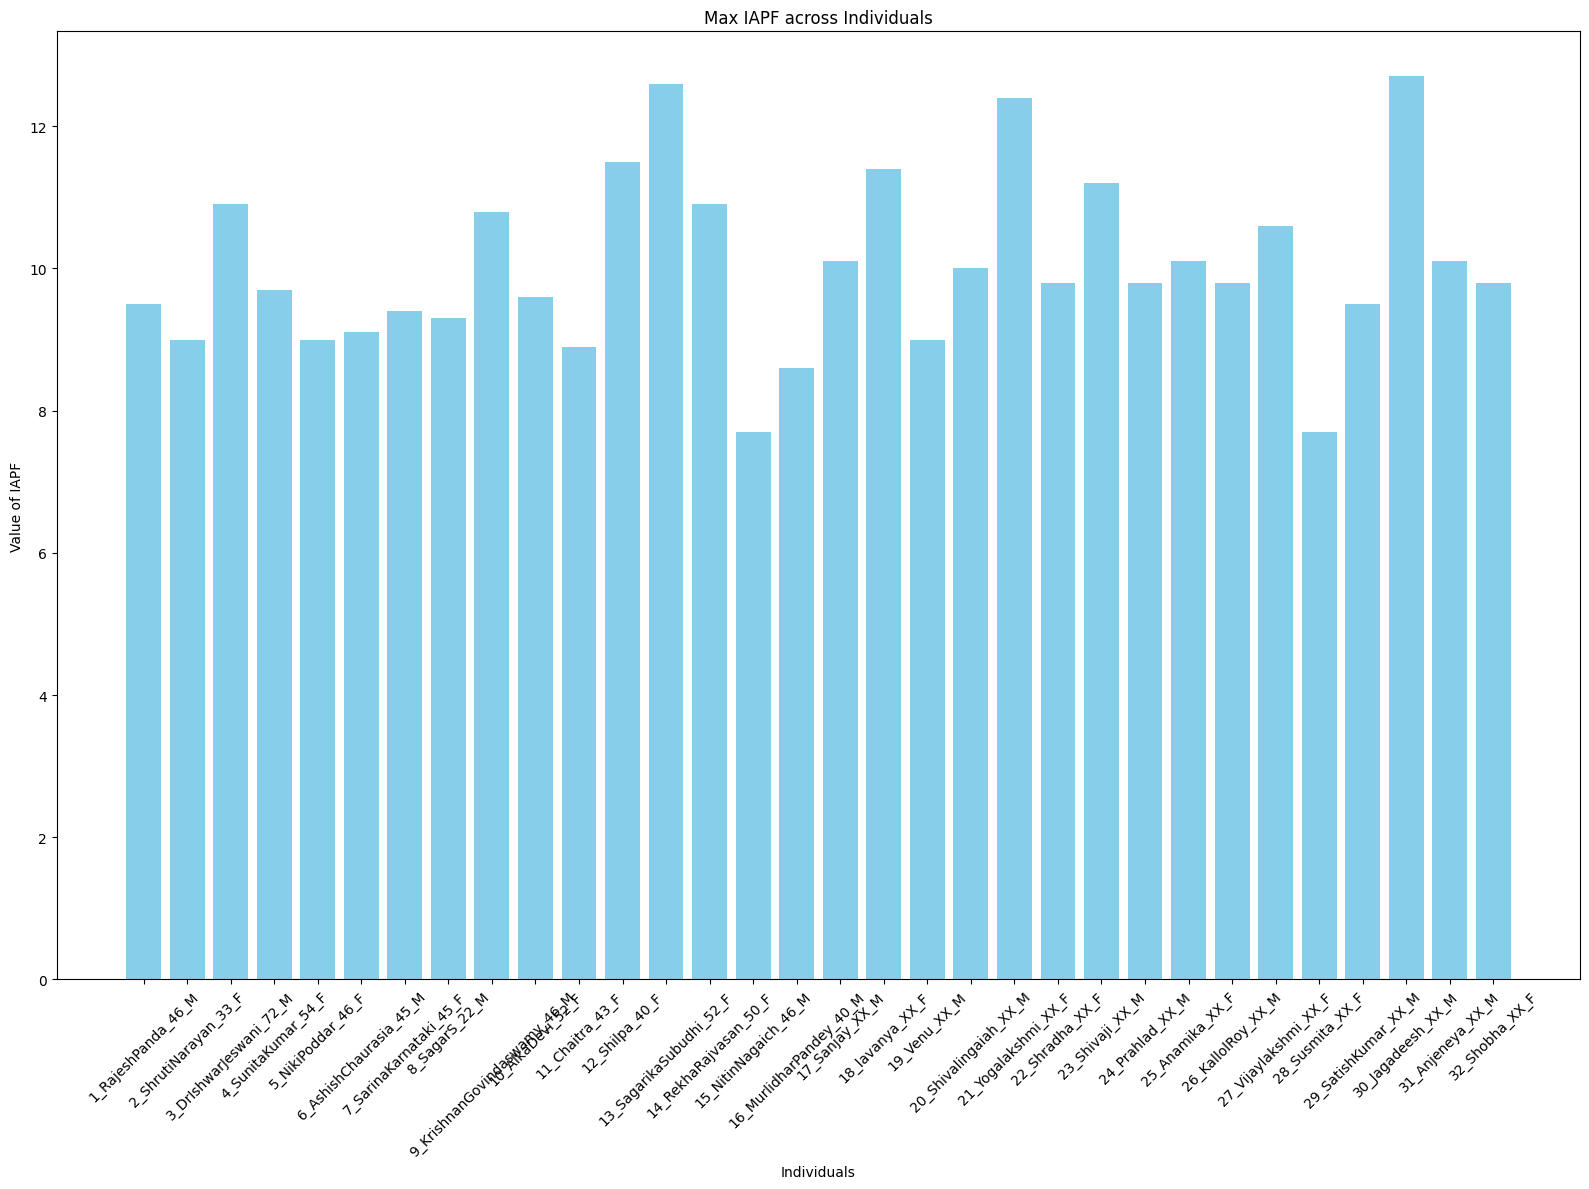

In [8]:
def plot_subjects_vs_parameter(chant_type_df=before_chant_subject_dfs, parameter_name = "IAPF"):
    individuals = []
    parameter_values = []
    
    for idx, df in enumerate(chant_type_df):
        
        individual_id = df.iloc[0]['Subject ID']
        individuals.append(individual_id)
        
        parameter_value = df[parameter_name].median() 
        parameter_values.append(parameter_value)
    
    print("individuals: ", individuals)
    print("Parameter values: ", parameter_values)

    # Create the bar plot
    plt.figure(figsize=(16, 12))
    plt.bar(individuals, parameter_values, color='skyblue')
    plt.xlabel('Individuals')
    plt.ylabel(f"Value of {parameter_name}")
    plt.title(f'Max {parameter_name} across Individuals')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_subjects_vs_parameter(before_chant_subject_dfs, parameter_name="IAPF")


This following cell helps implement the second point:

In [10]:
plot_files = []
html_content = ""

def plot_subjects_vs_parameter(before_chant_subject_dfs, during_chant_subject_dfs, after_chant_subject_dfs, parameter_name="IAPF", description=""):
    individuals = []
    before_values = []
    during_values = []
    after_values = []

    for idx, df in enumerate(before_chant_subject_dfs):
        individual_id = df.iloc[0]['Subject ID']
        individuals.append(individual_id)
        before_values.append(df[parameter_name].max())

    for idx, df in enumerate(during_chant_subject_dfs):
        during_values.append(df[parameter_name].max())

    for idx, df in enumerate(after_chant_subject_dfs):
        after_values.append(df[parameter_name].max())

    x = np.arange(len(individuals)) 
    width = 0.25 

    fig, ax = plt.subplots(figsize=(16, 12))

    rects1 = ax.bar(x - width, before_values, width, label='Before Chant', color='skyblue')
    rects2 = ax.bar(x, during_values, width, label='During Chant', color='lightgreen')
    rects3 = ax.bar(x + width, after_values, width, label='After Chant', color='lightcoral')

    ax.set_xlabel('Individuals')
    ax.set_ylabel(f'Value of {parameter_name}')
    ax.set_title(f'Max {parameter_name} across Individuals')
    
    ax.set_xticks(x)
    ax.set_xticklabels(individuals, rotation=45)
    ax.legend()
    
    ax.text(0.5, 1.1, description, transform=ax.transAxes, ha='center')

    plt.tight_layout()
    plt.show()
    
    return fig

Along with each plot, the following code helps with `descriptive` statistics for each of the parameter.
Then saves all the plots to a `plots.pdf` file

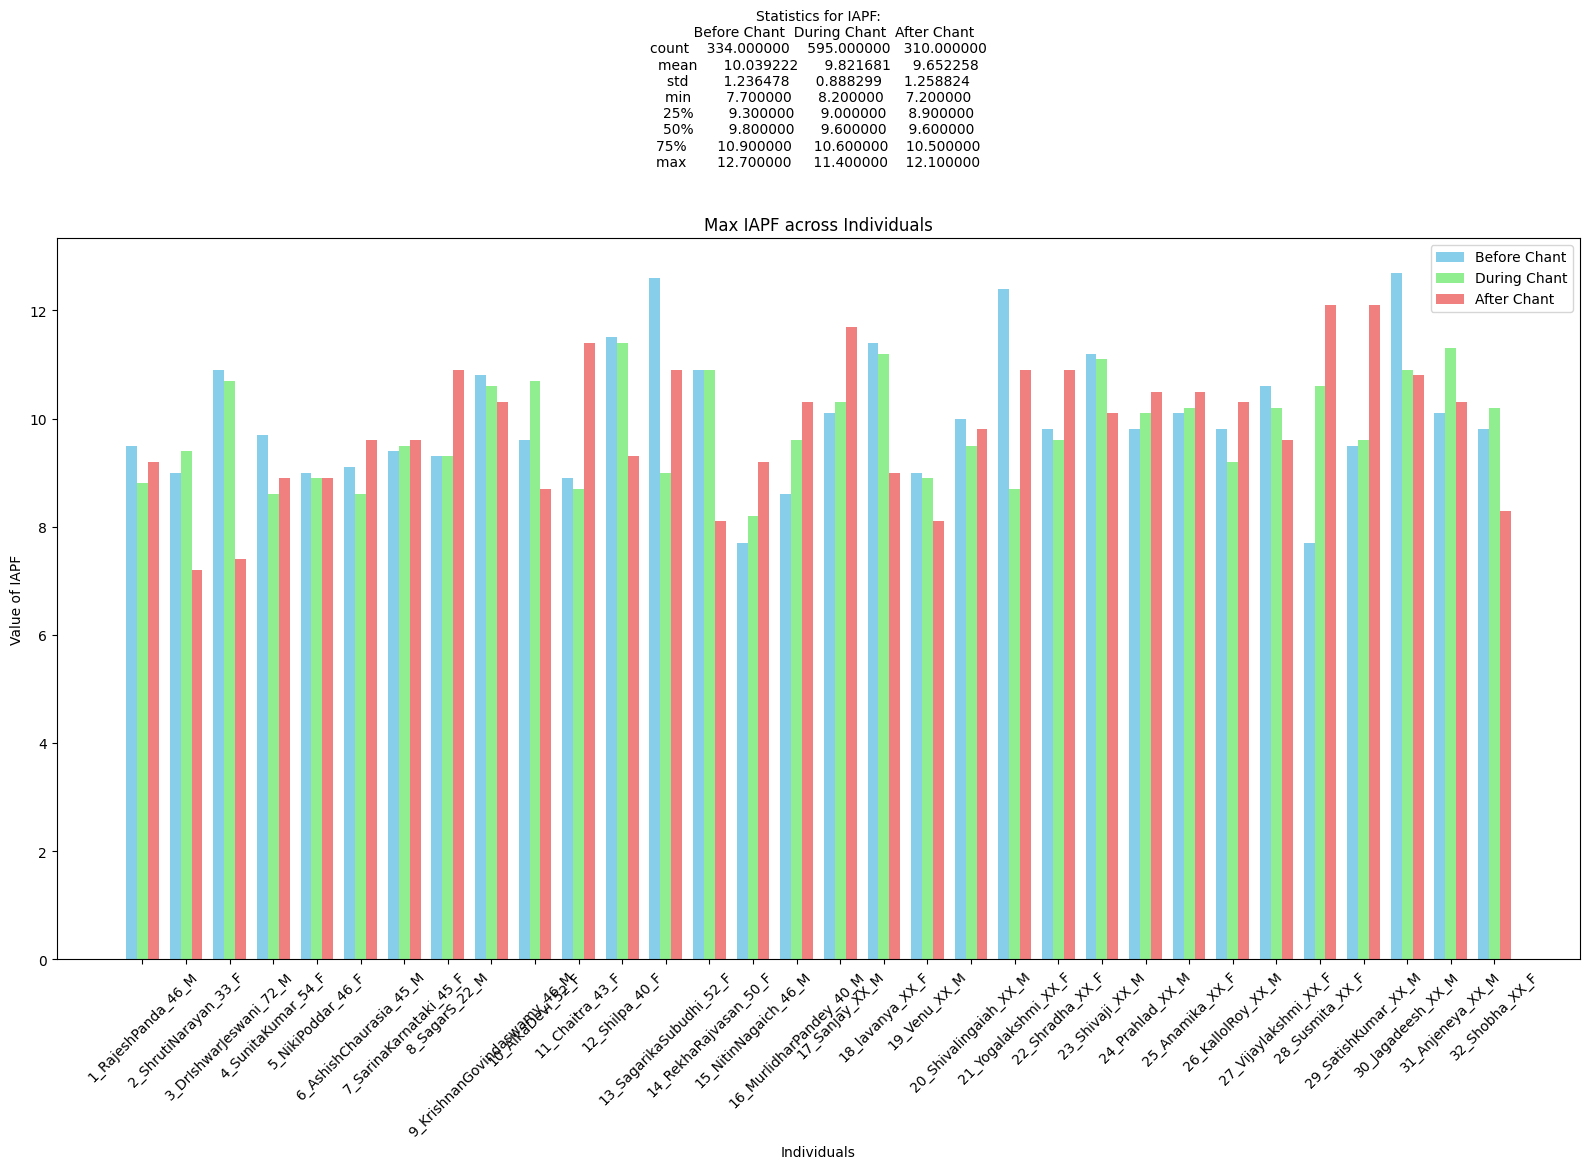

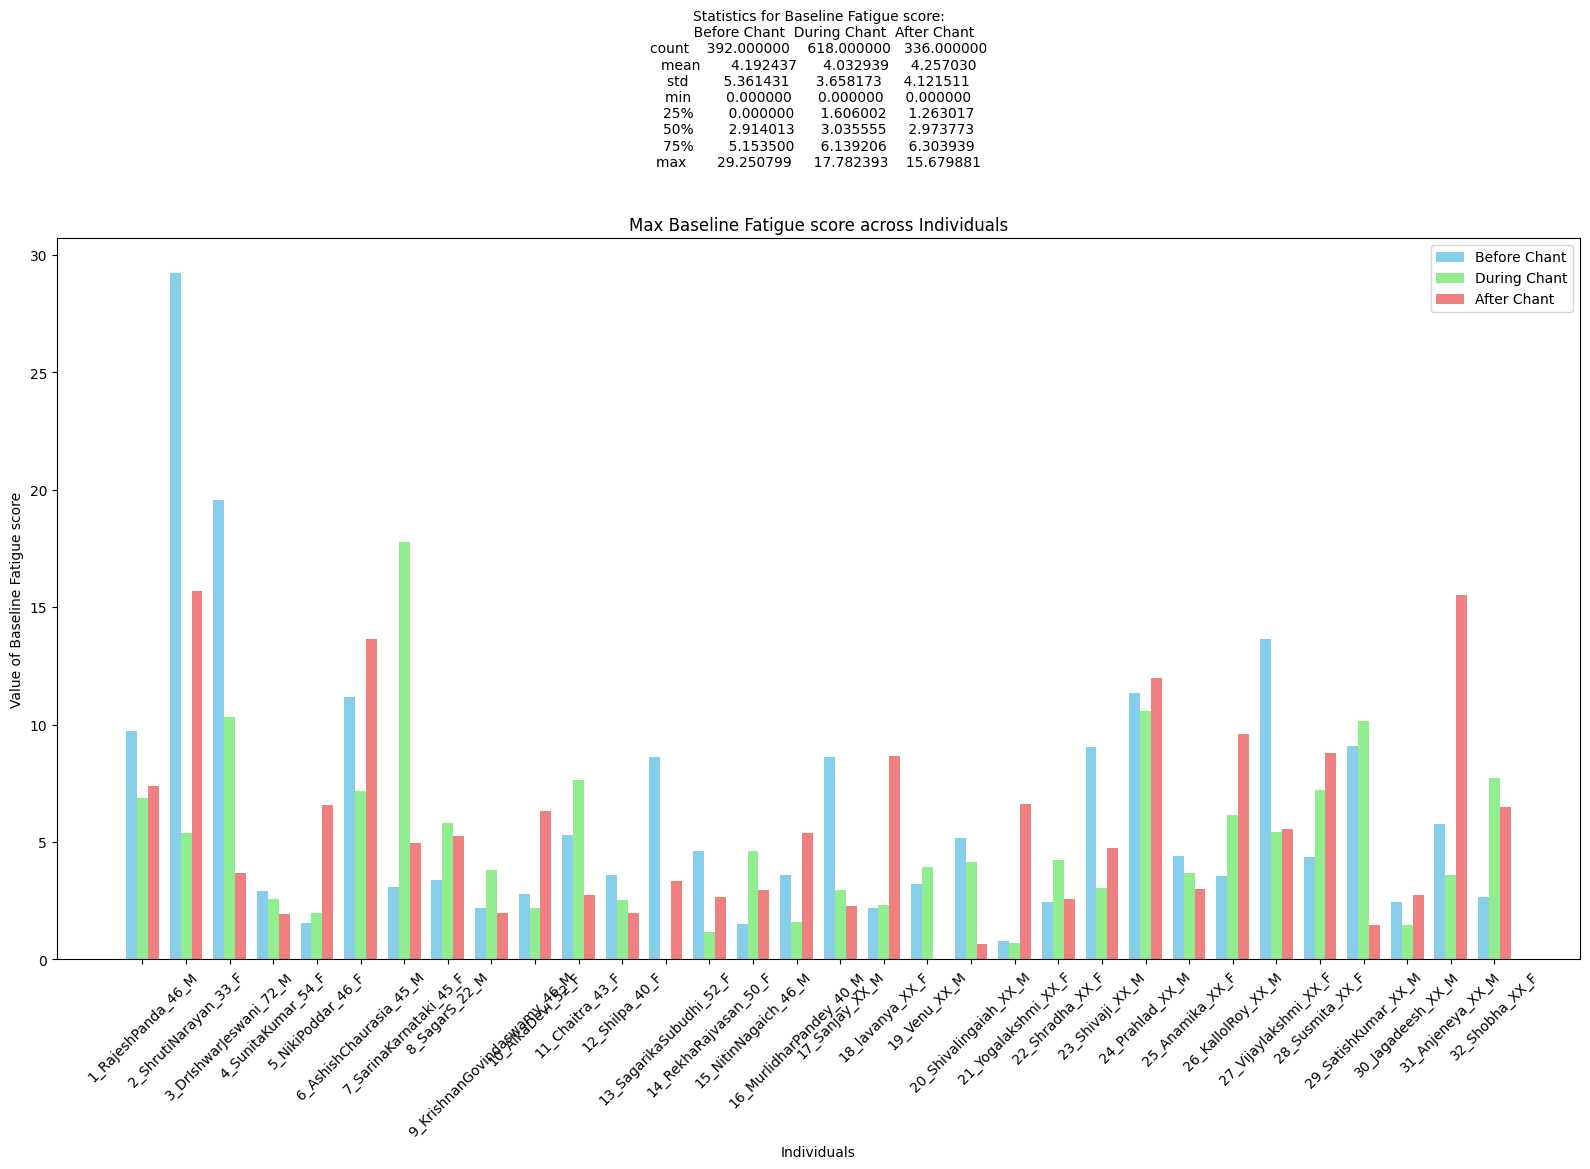

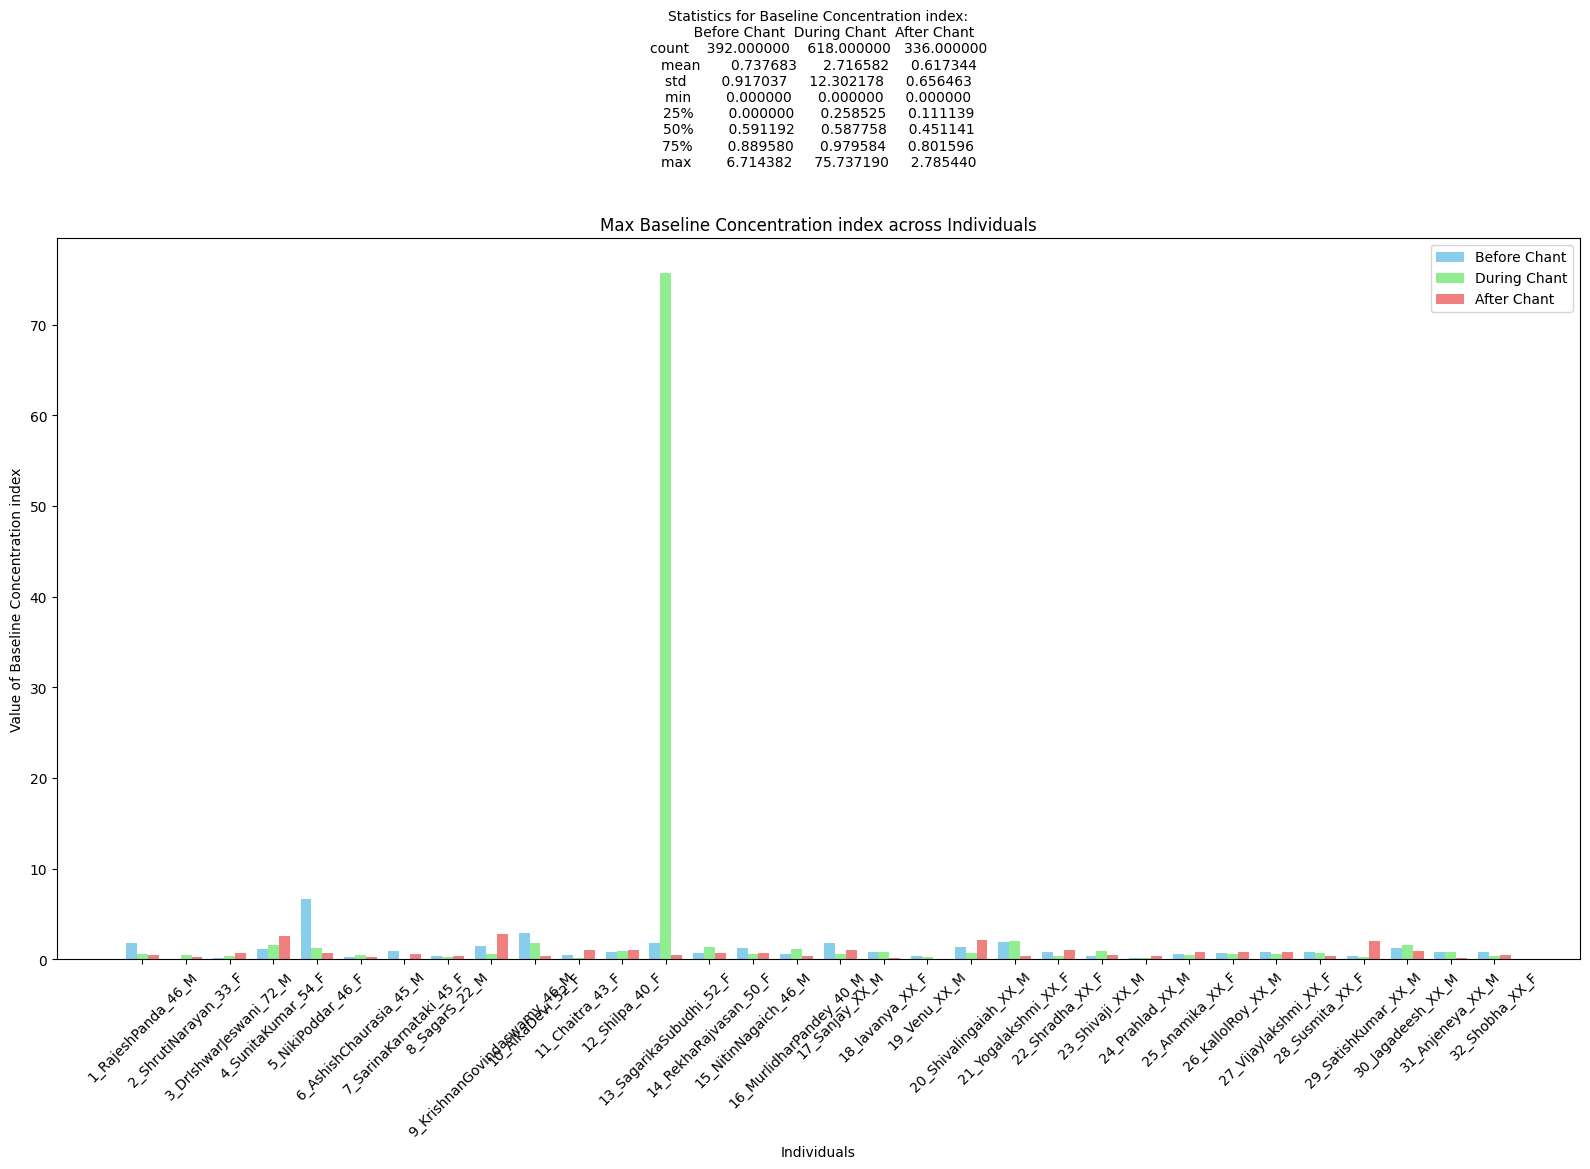

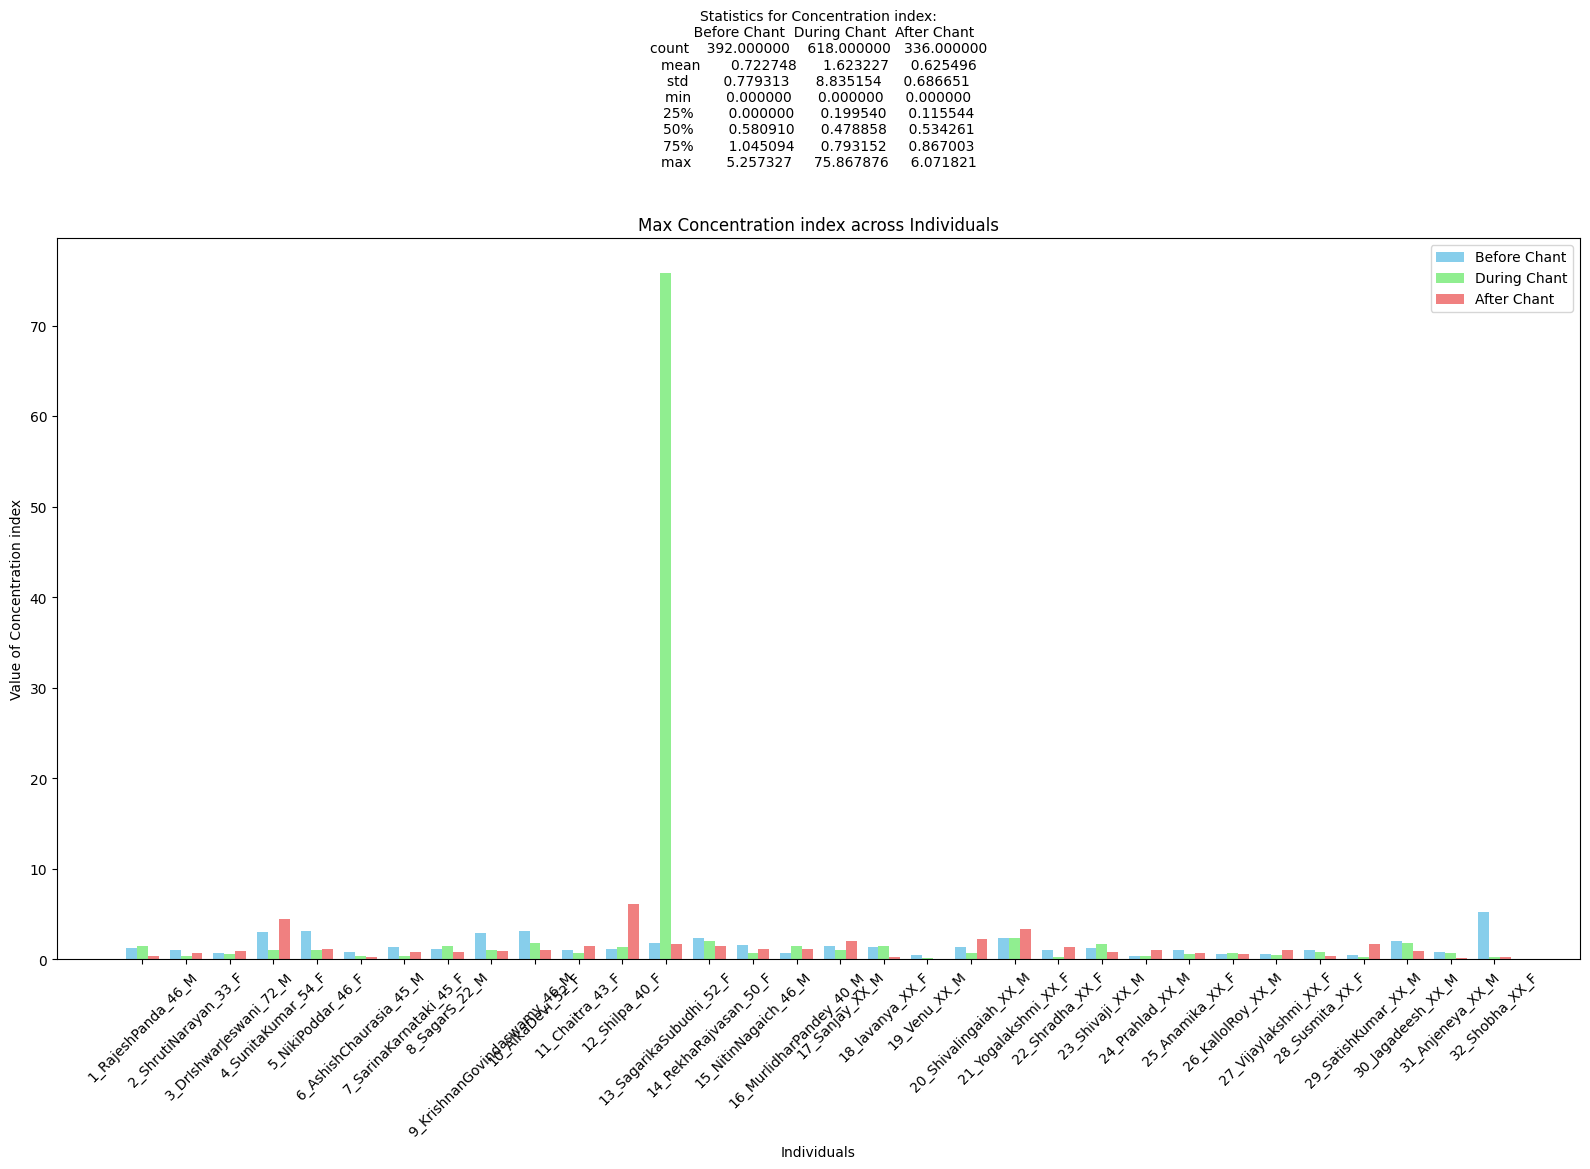

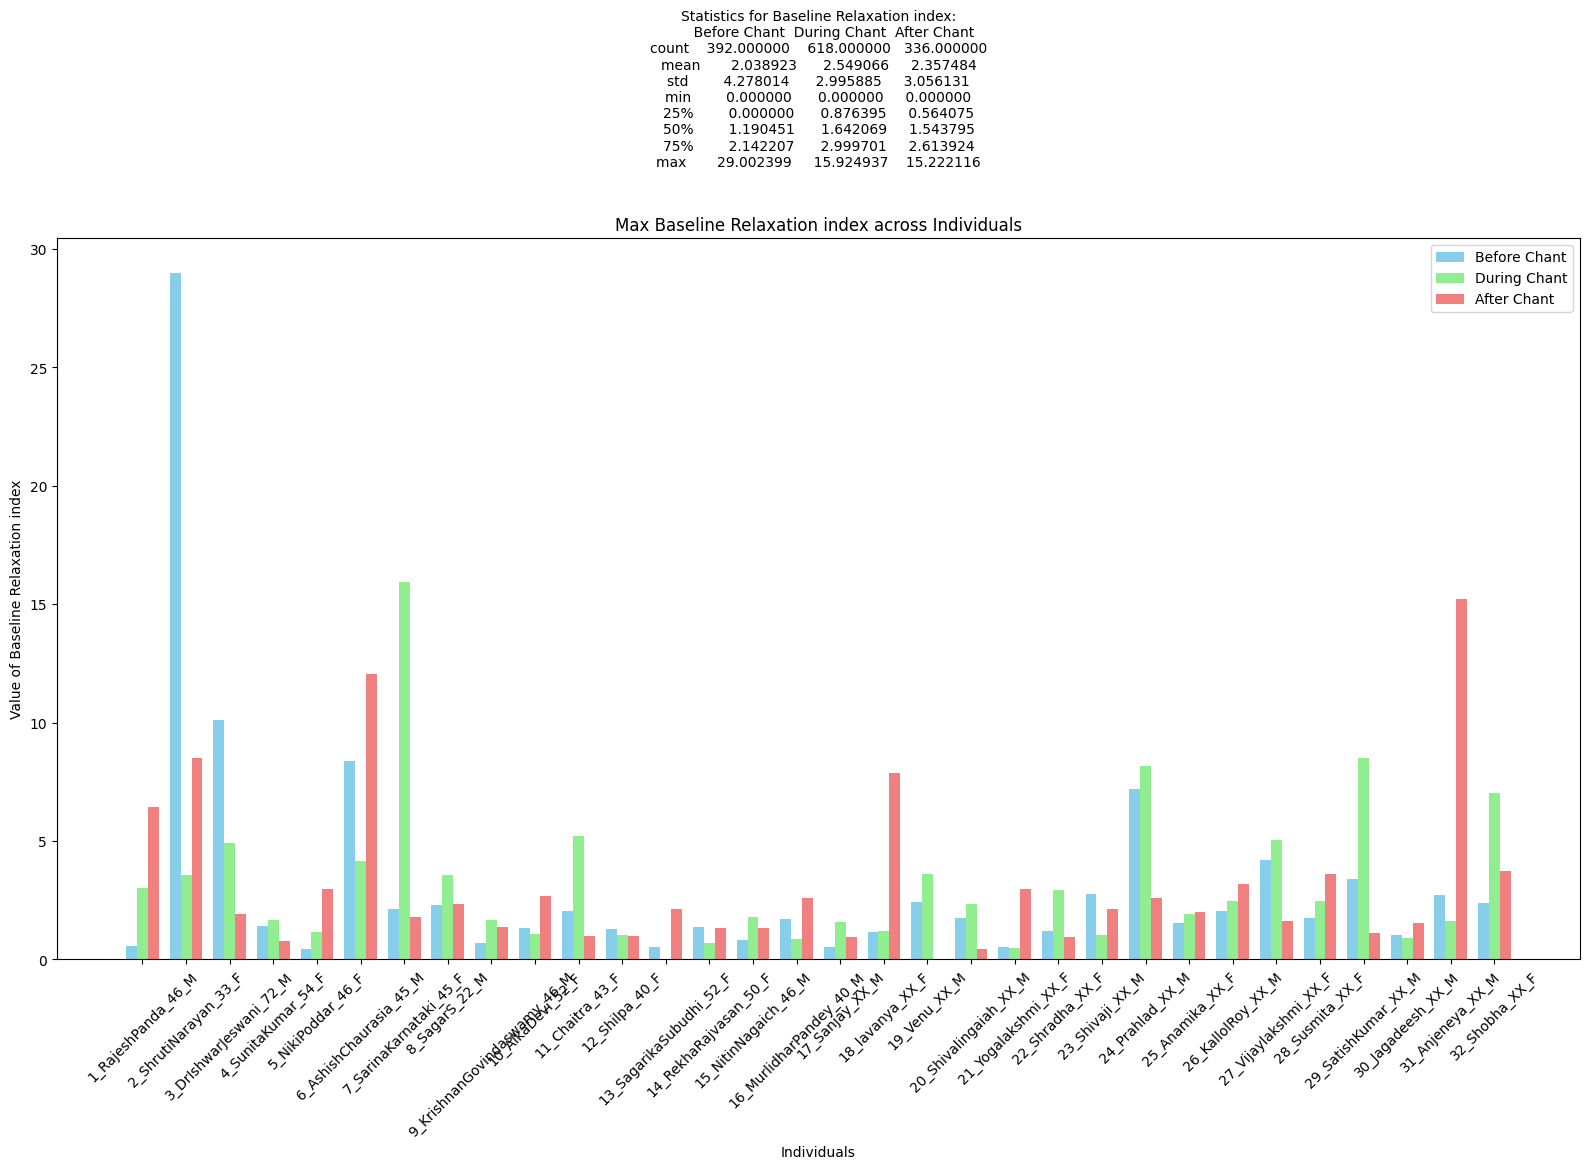

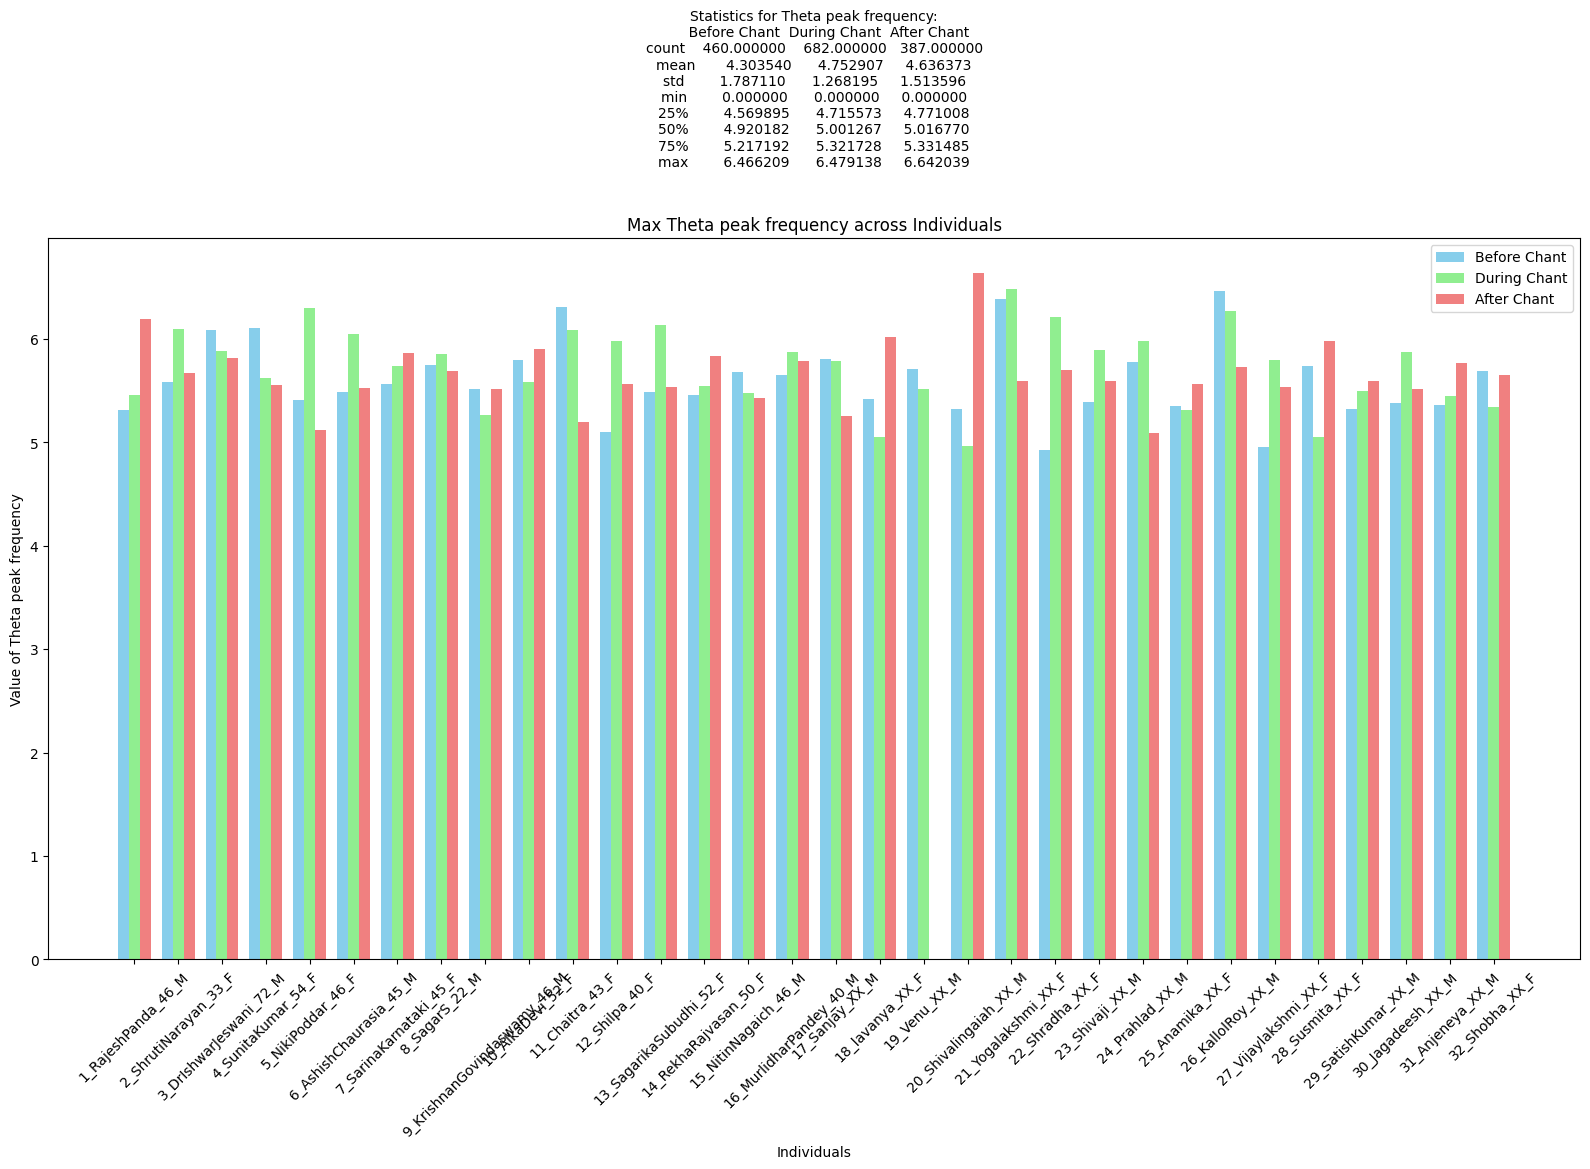

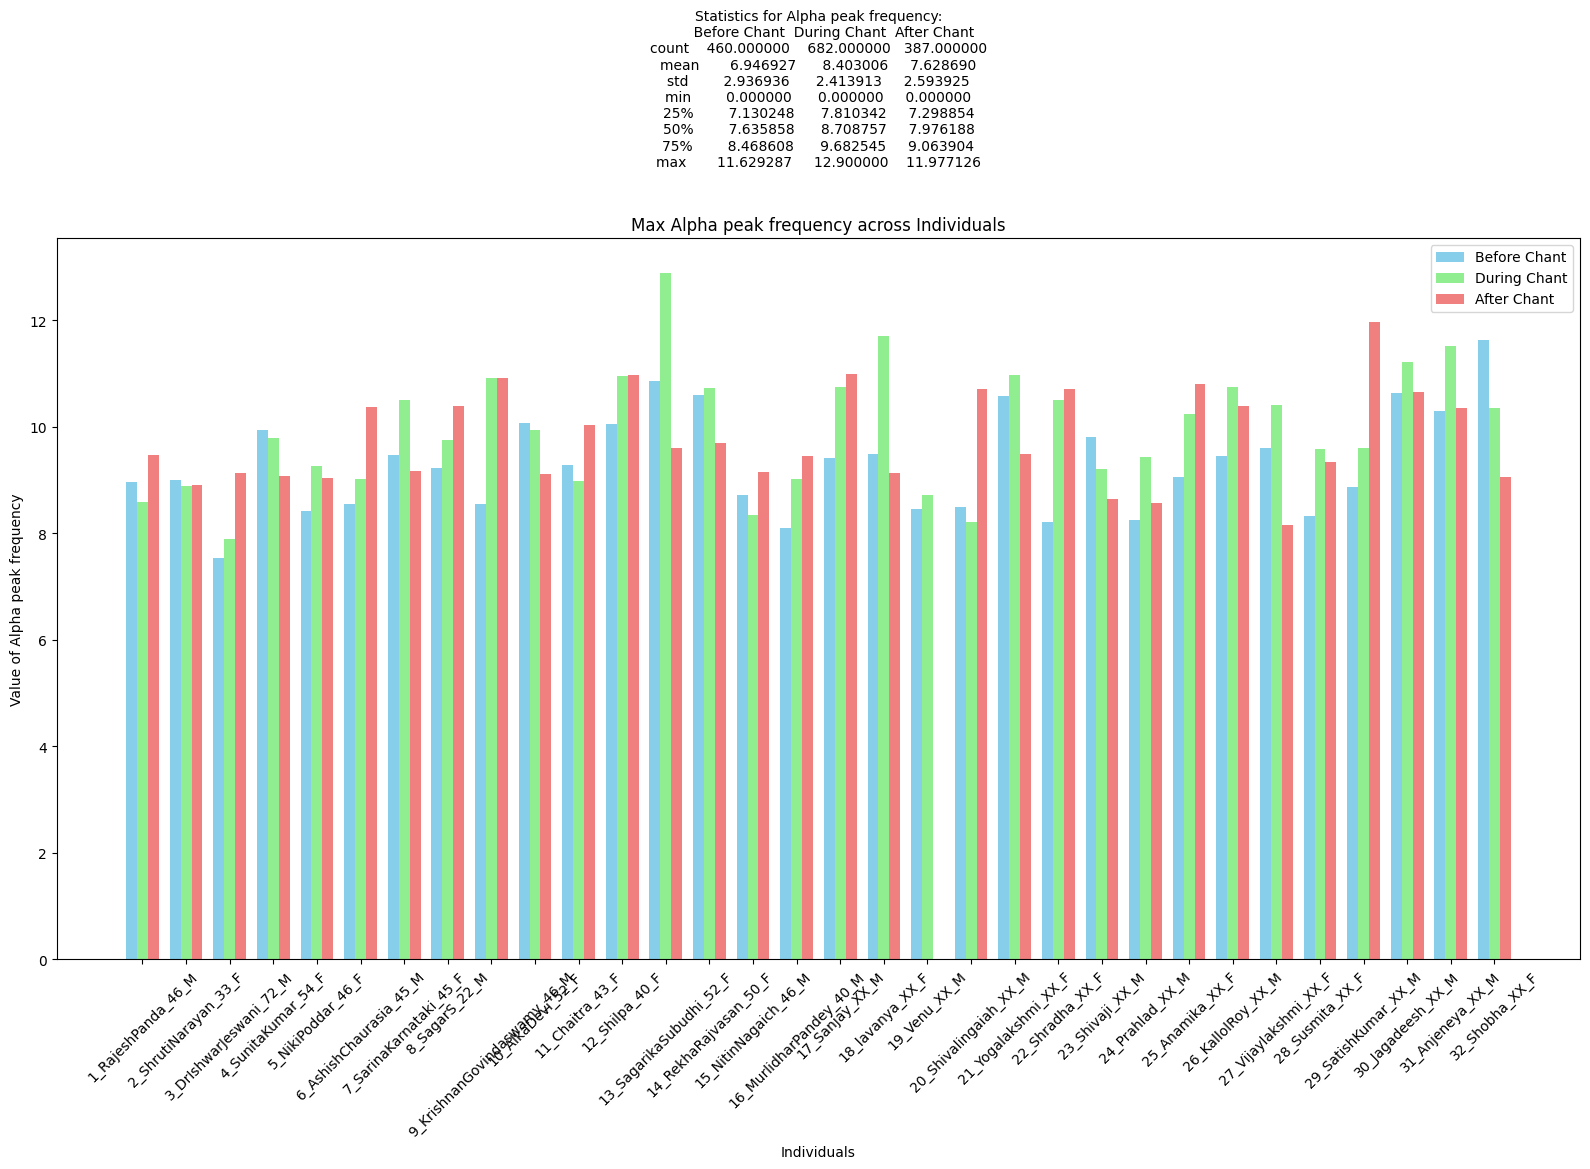

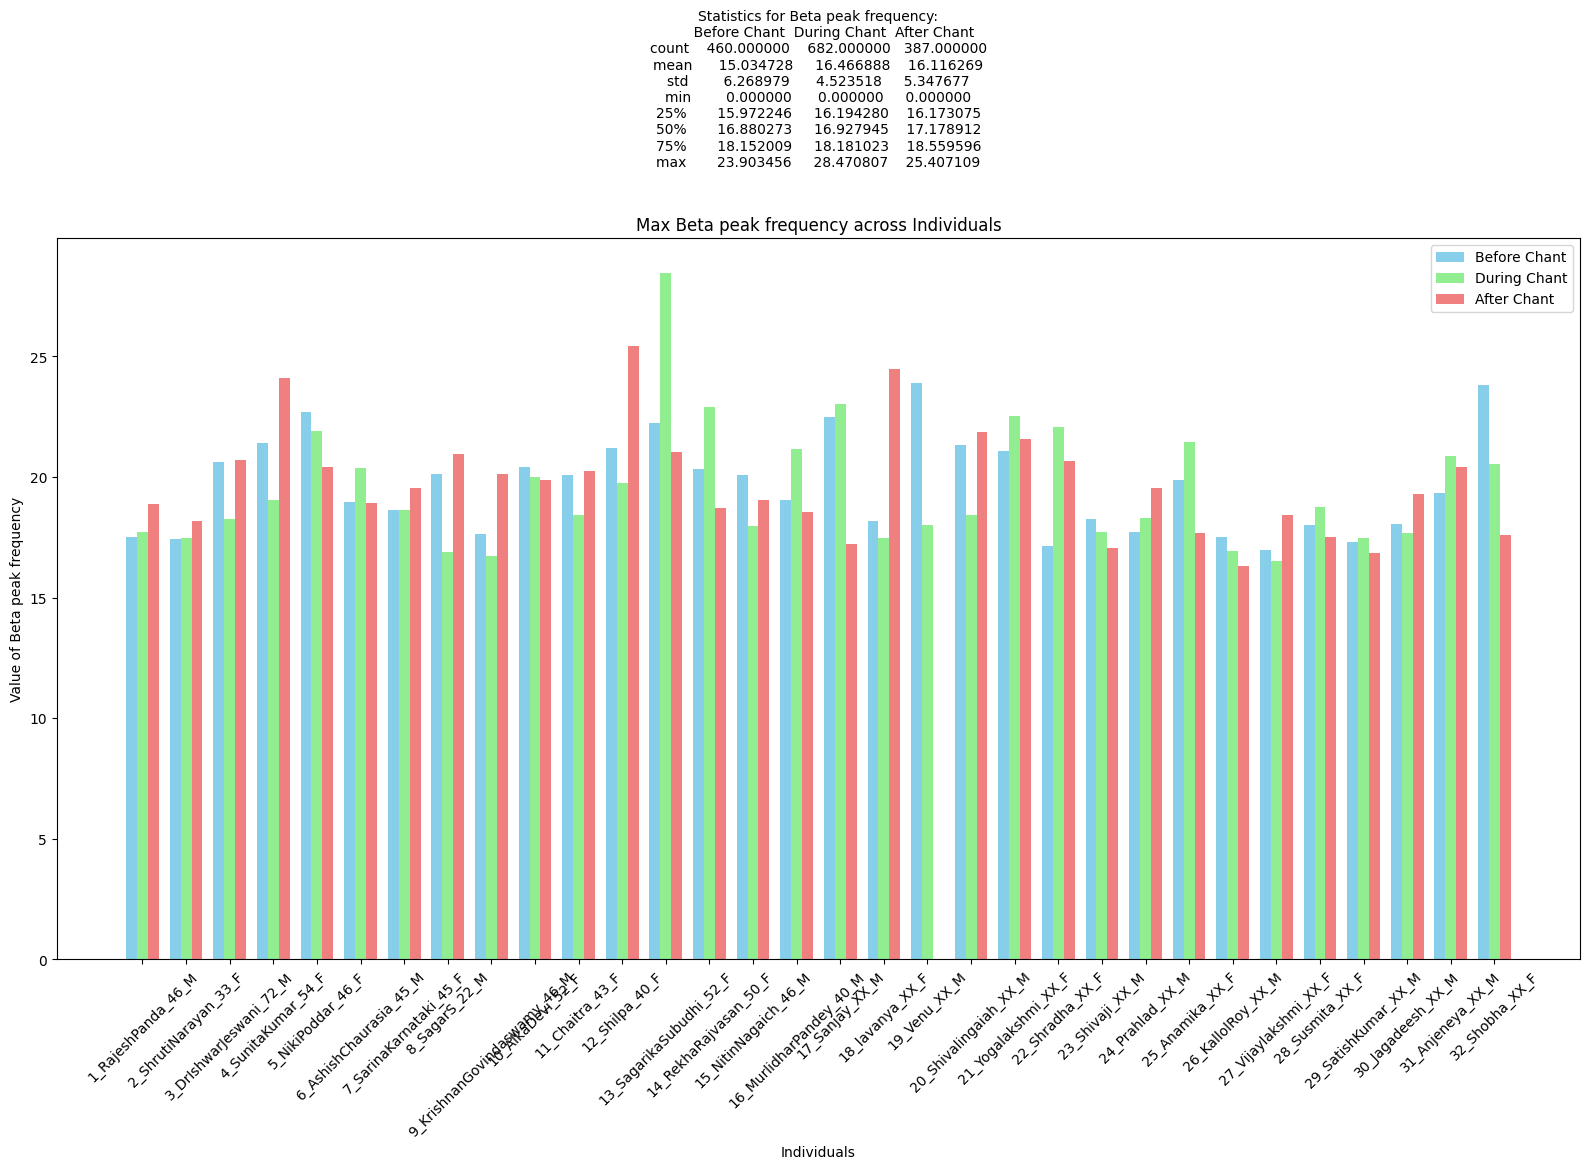

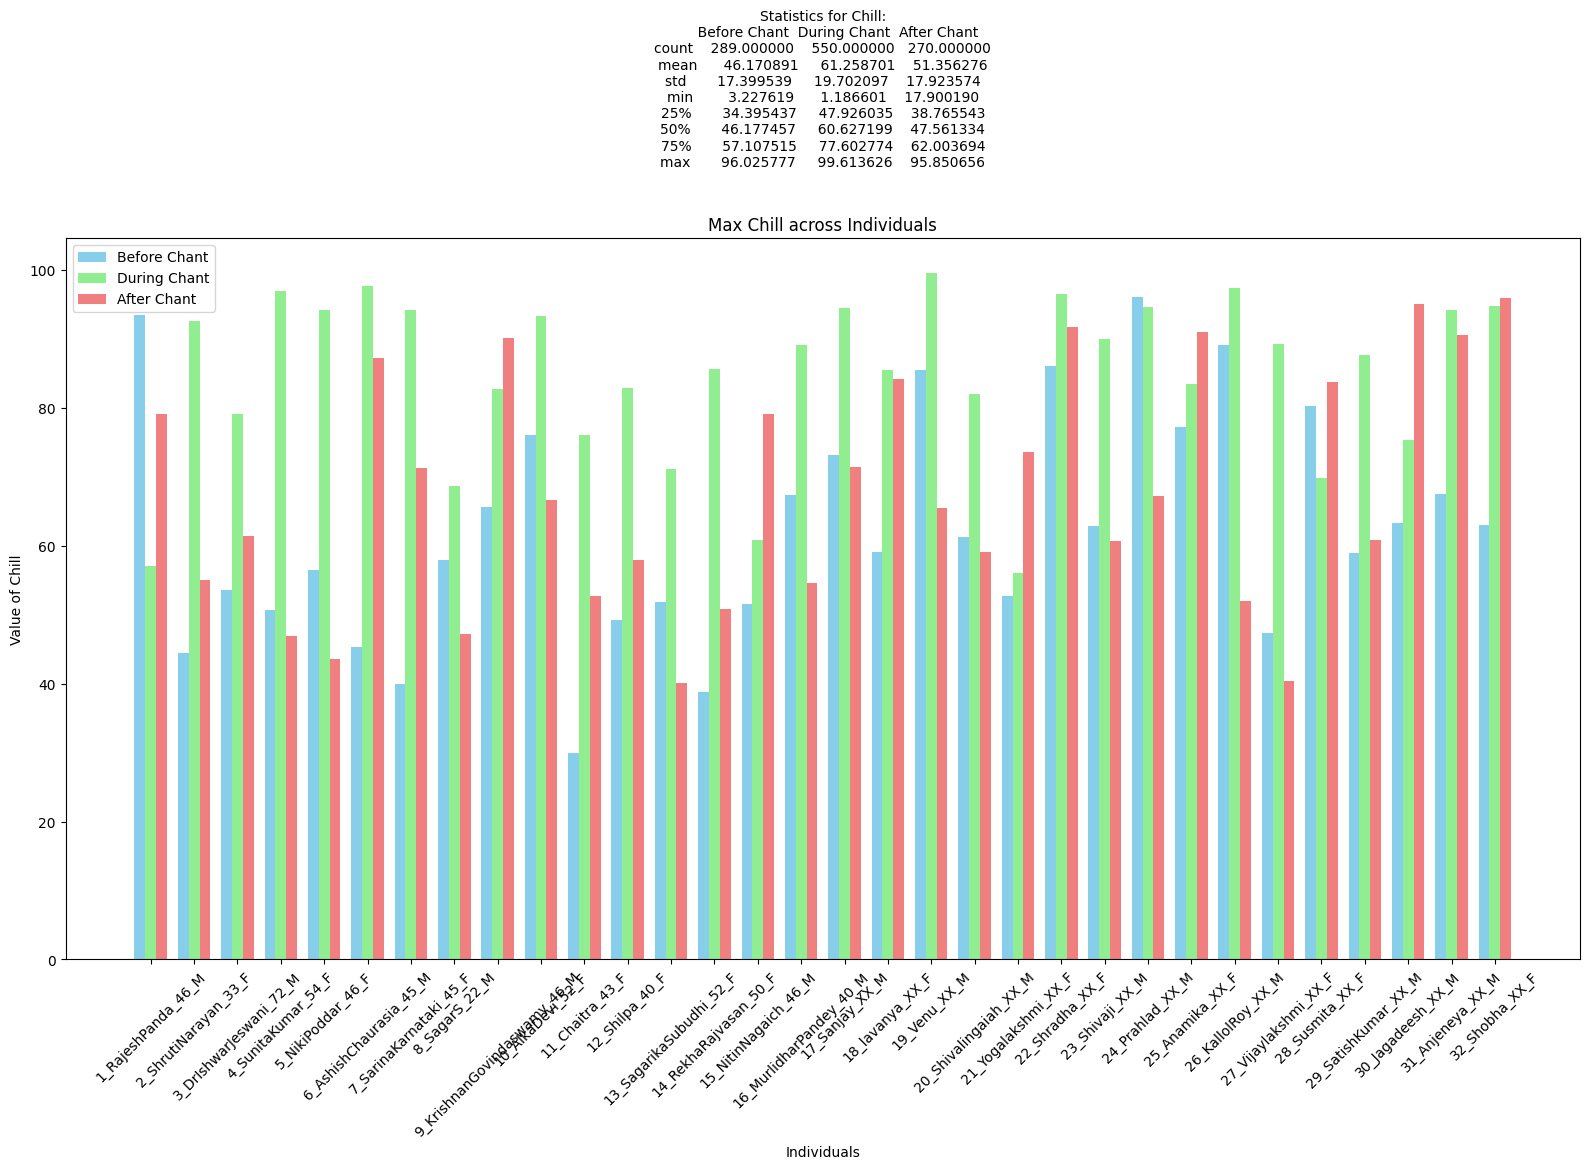

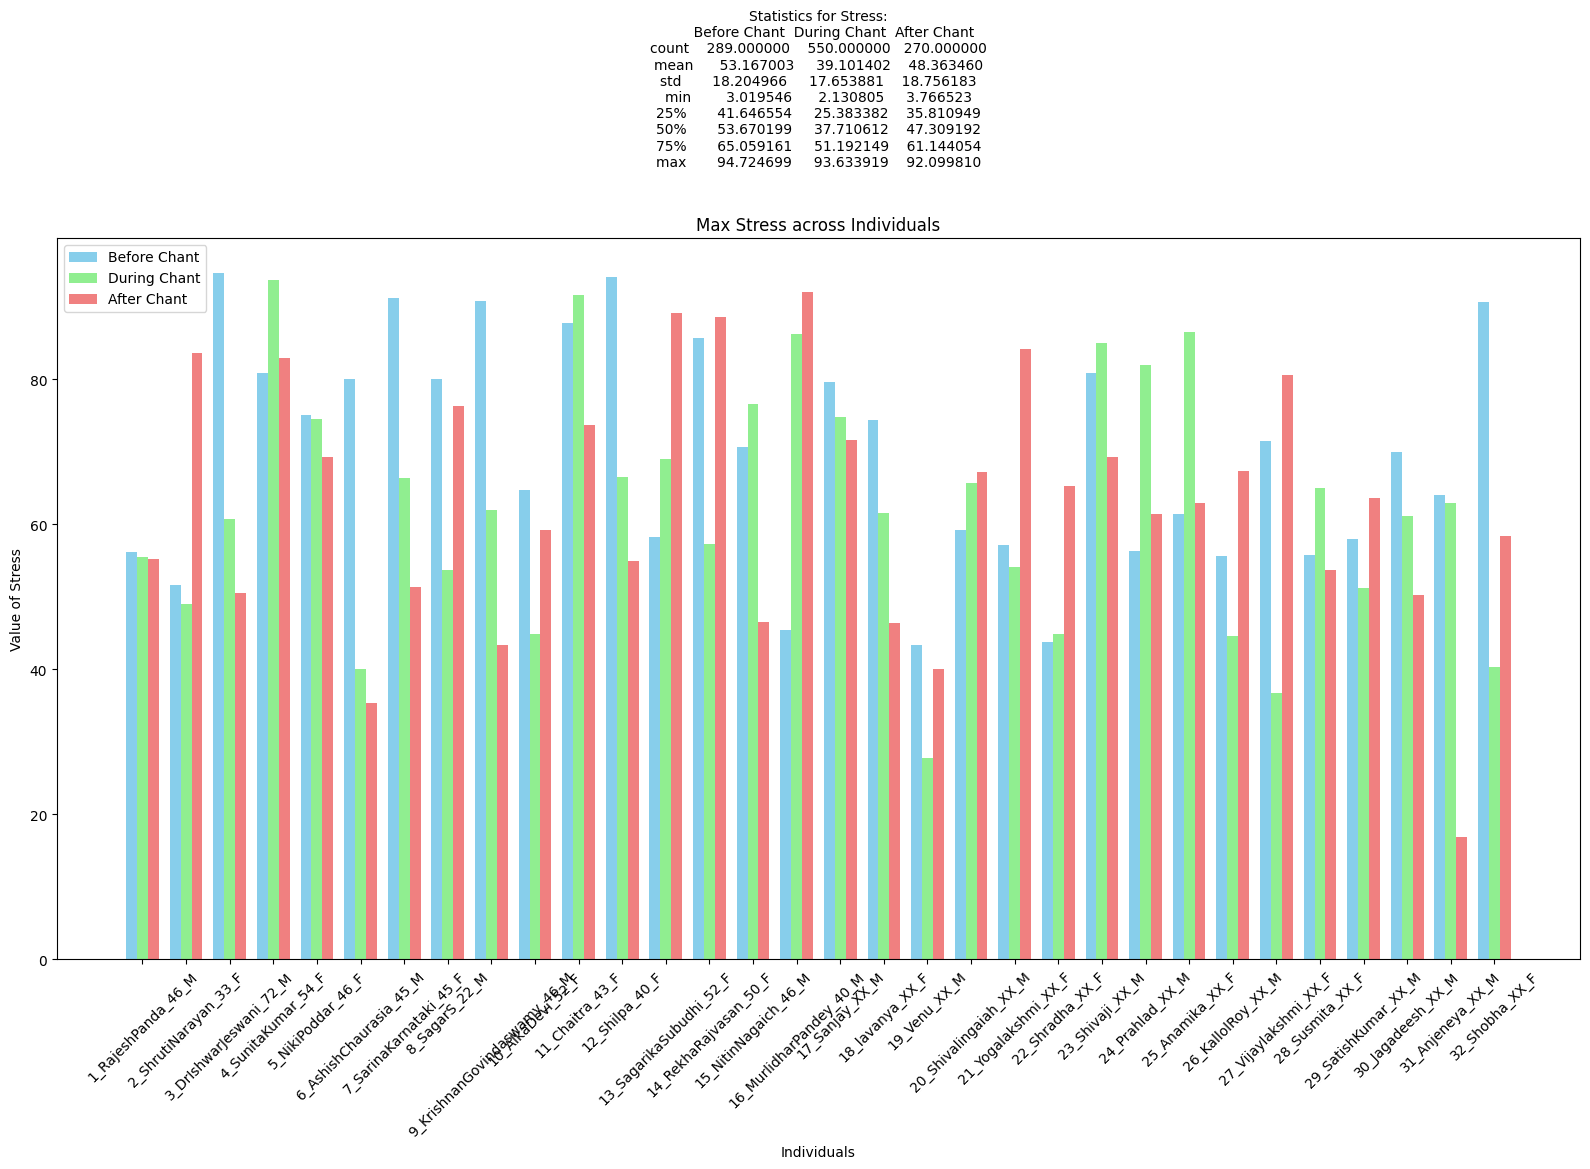

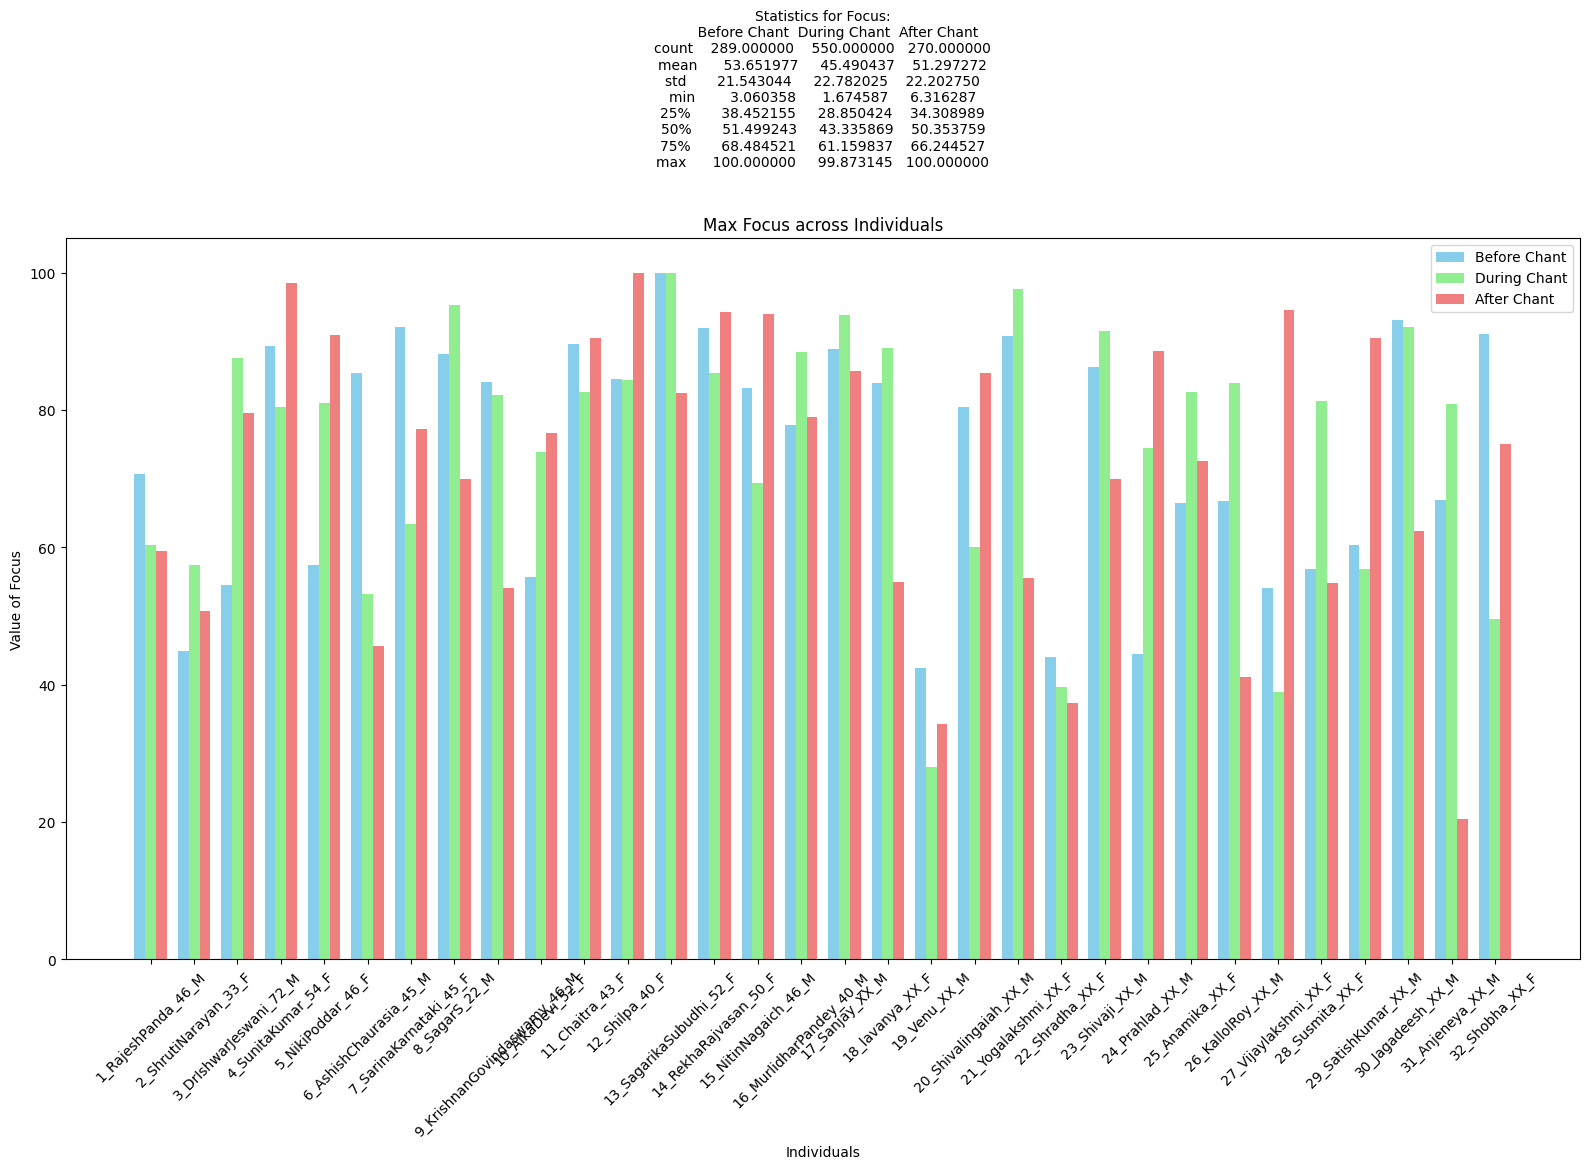

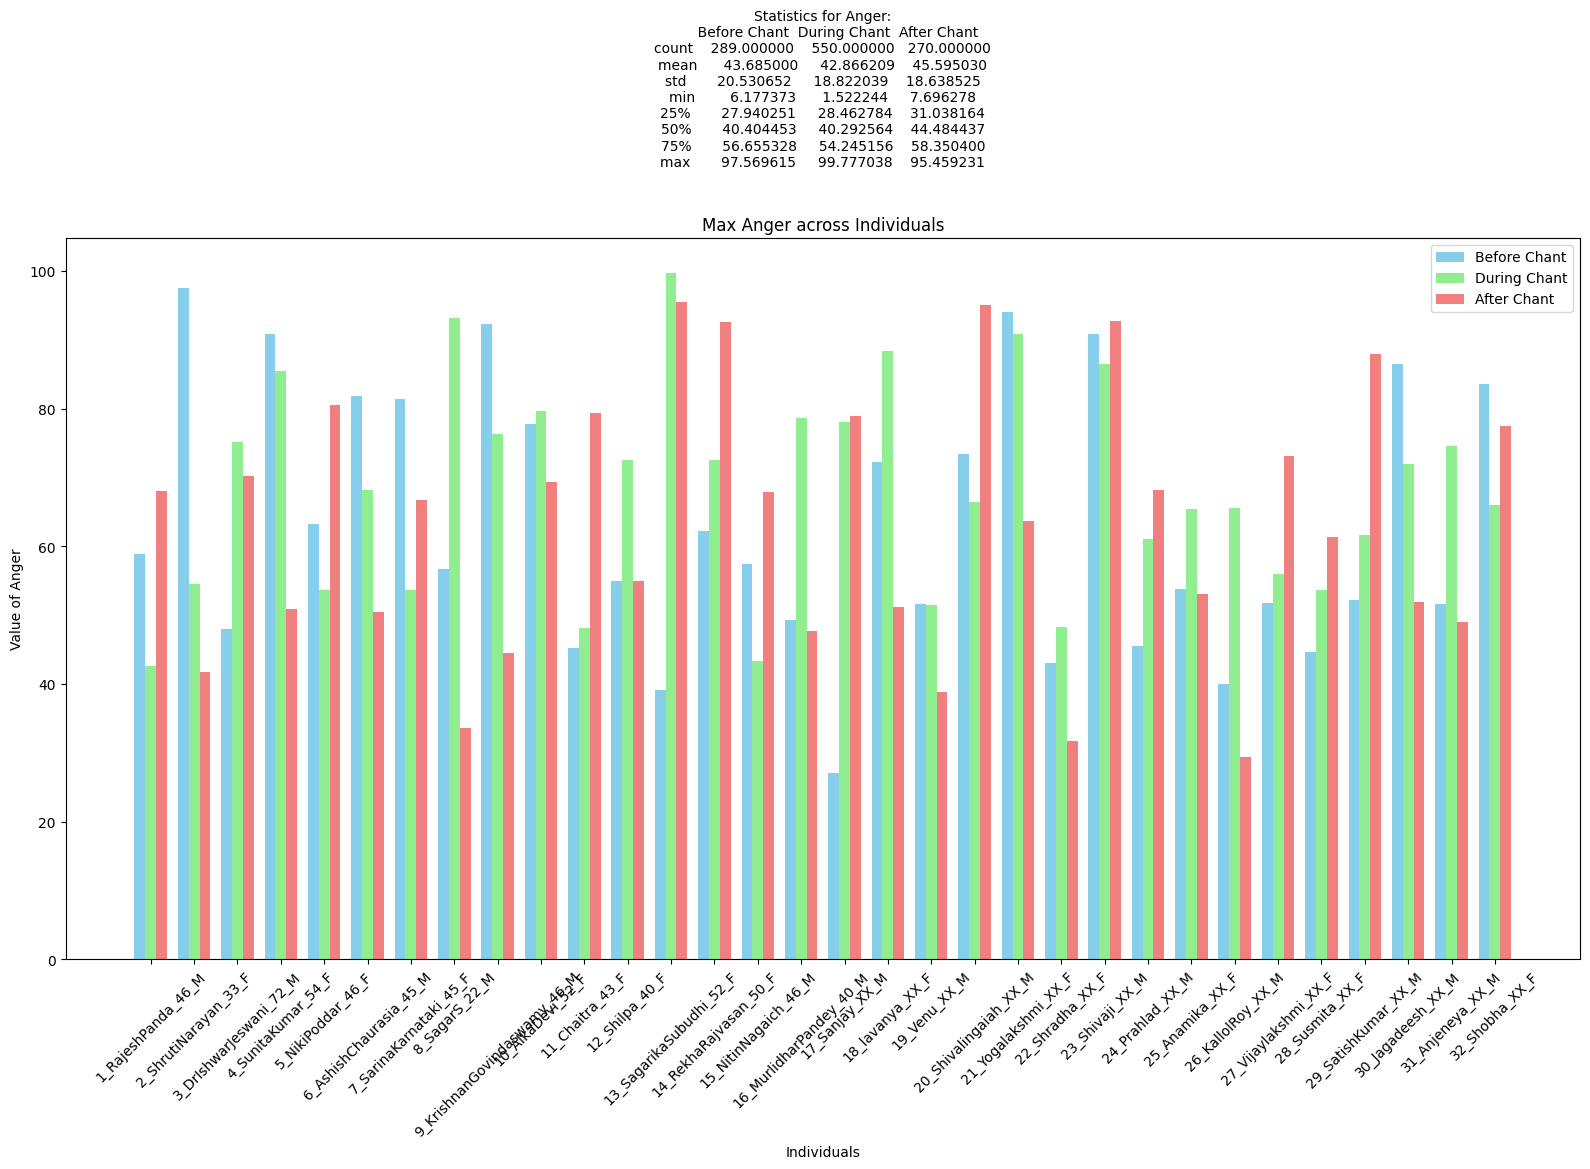

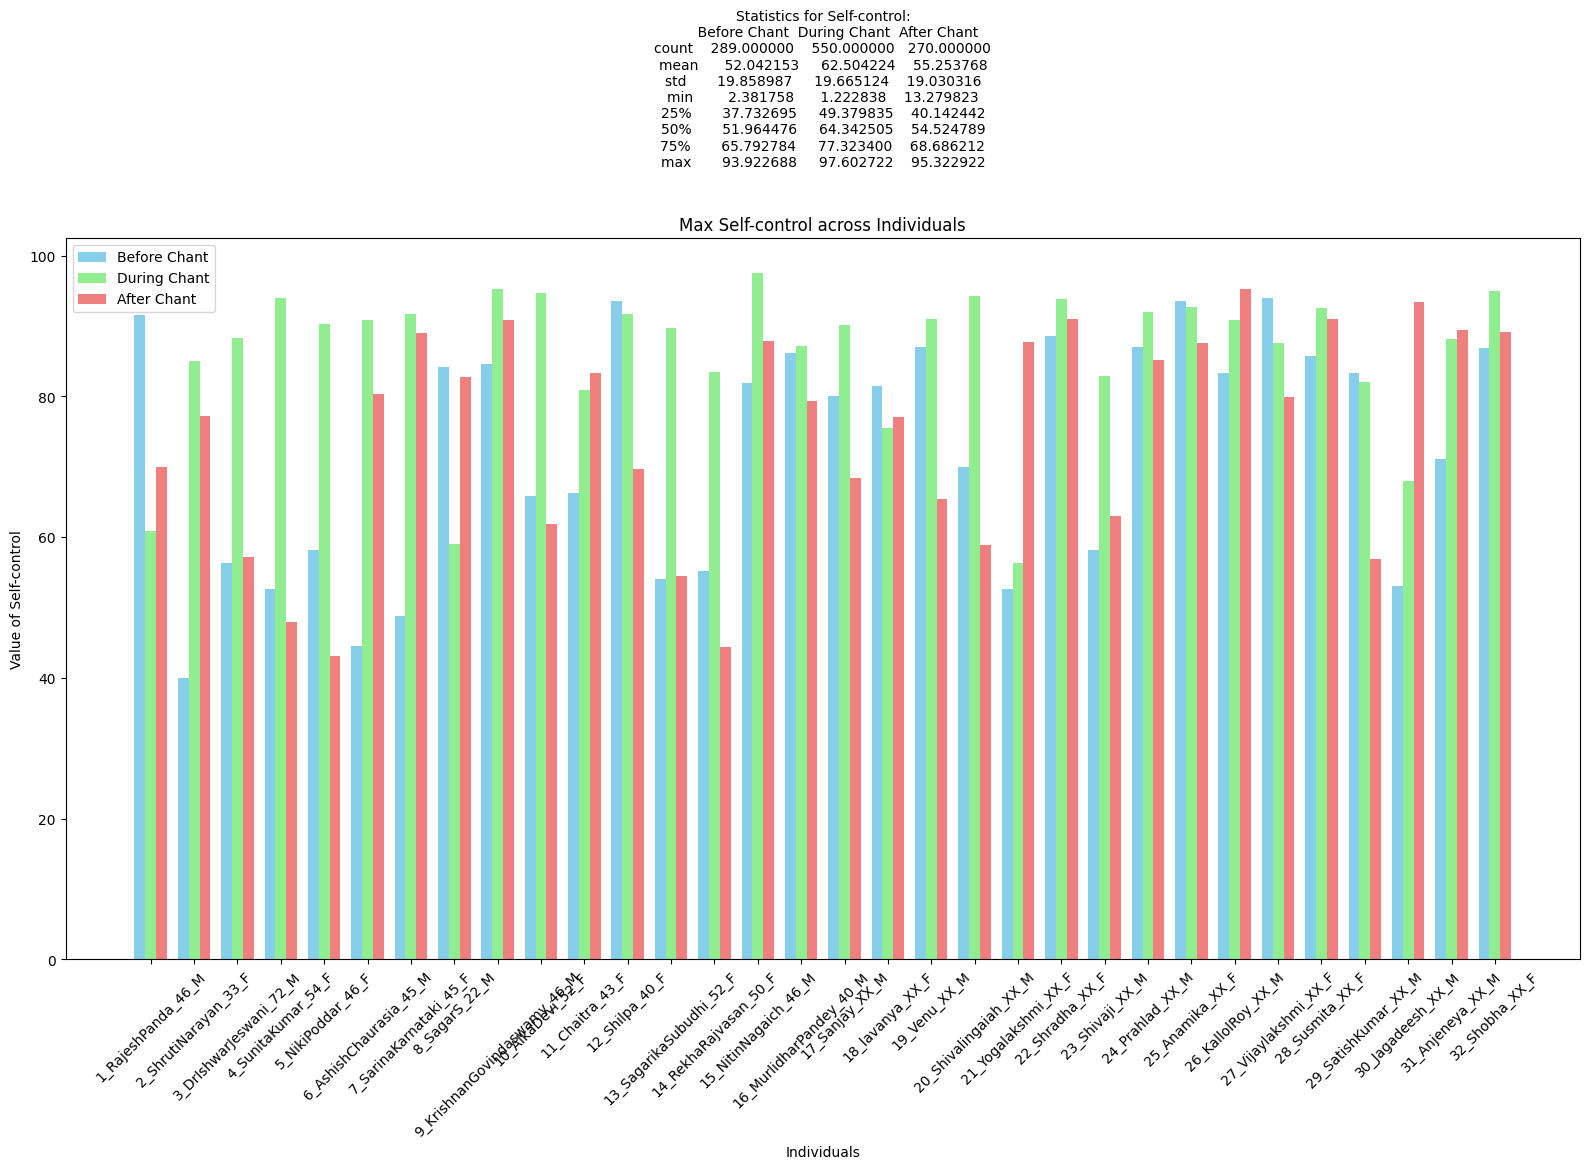

Plots saved to plots.pdf


In [11]:
def compare_parameter_statistics(param_name, before_df, during_df, after_df):
    before_values = []
    during_values = []
    after_values = []
    
    for subject_before_df in before_df:
        before_values.extend(subject_before_df[param_name])
        
    for subject_during_df in during_df:
        during_values.extend(subject_during_df[param_name])
        
    for subject_after_df in after_df:
        after_values.extend(subject_after_df[param_name])

    before_stats = pd.Series(before_values).describe()
    during_stats = pd.Series(during_values).describe()
    after_stats = pd.Series(after_values).describe()

    comparison_df = pd.DataFrame({
        'Before Chant': before_stats,
        'During Chant': during_stats,
        'After Chant': after_stats
    })

    return comparison_df

pdf_filename = "plots.pdf"
pdf_pages = PdfPages(pdf_filename)
comparison_statistics_across_parameters = {}

for param_name in parameters_to_plot:
    comparison_statistics_across_parameters[param_name] = compare_parameter_statistics(param_name, before_chant_subject_dfs, during_chant_subject_dfs, after_chant_subject_dfs)
    statistics_df = comparison_statistics_across_parameters[param_name] 
    description = f"Statistics for {param_name}:\n{statistics_df.to_string()}" 
    fig = plot_subjects_vs_parameter(before_chant_subject_dfs, during_chant_subject_dfs, after_chant_subject_dfs, parameter_name=param_name, description=description)
    pdf_pages.savefig(fig)
    plt.close(fig)

pdf_pages.close()

print(f"Plots saved to {pdf_filename}")

comparison_df = pd.concat(comparison_statistics_across_parameters, axis=1)
#comparison_df.to_csv("comparison_data.csv")


In [12]:
all_subjects_before = []
all_subjects_during = []
all_subjects_after = []

for subject in before_chant_subject_dfs:
    all_subjects_before.append(subject[parameters_to_plot].max(numeric_only=True))

for subject in during_chant_subject_dfs:
    all_subjects_during.append(subject[parameters_to_plot].max(numeric_only=True))
    
for subject in after_chant_subject_dfs:
    all_subjects_after.append(subject[parameters_to_plot].max(numeric_only=True))

before_mean = sum(all_subjects_before) / len(all_subjects_before)
during_mean = sum(all_subjects_during) / len(all_subjects_during)
after_mean = sum(all_subjects_after) / len(all_subjects_after)

percentage_change_during_before = ((during_mean - before_mean) / before_mean) * 100
percentage_change_after_during = ((after_mean - during_mean) / during_mean) * 100
percentage_change_after_before = ((after_mean - before_mean) / during_mean) * 100

# print("Percentage change from before to during chant:")
# print(percentage_change_during_before)

# print("\nPercentage change from during to after chant:")
# print(percentage_change_after_during)

# print("\nPercentage change from after to before chant:")
# print(percentage_change_after_before)

The following code gives the consolidated analysis for the HKM Data. One can easily note the percentange difference in eadch of the parameters before - during, during - after, and overall before - after percentage change (with Increase or Descrease specified) 

This is the ultimate conclusion of the data which can be later plotted for a `correlation matrix` to show the relatioonship between the 3 events (before during and after) i,e, how all the parameters together are varying!

In [13]:
all_subjects_before = []
all_subjects_during = []
all_subjects_after = []

for subject in before_chant_subject_dfs:
    all_subjects_before.append(subject[parameters_to_plot].max(numeric_only=True))

for subject in during_chant_subject_dfs:
    all_subjects_during.append(subject[parameters_to_plot].max(numeric_only=True))
    
for subject in after_chant_subject_dfs:
    all_subjects_after.append(subject[parameters_to_plot].max(numeric_only=True))

before_mean = sum(all_subjects_before) / len(all_subjects_before)
during_mean = sum(all_subjects_during) / len(all_subjects_during)
after_mean = sum(all_subjects_after) / len(all_subjects_after)

percentage_change_during_before = ((during_mean - before_mean) / before_mean) * 100
percentage_change_after_during = ((after_mean - during_mean) / during_mean) * 100
percentage_change_after_before = ((after_mean - before_mean) / during_mean) * 100

increase_decrease_before = ["Increased" if change > 0 else "Decreased" for change in percentage_change_during_before]
increase_decrease_after = ["Increased" if change > 0 else "Decreased" for change in percentage_change_after_during]
increase_decrease_after_before = ["Increased" if change > 0 else "Decreased" for change in percentage_change_after_before]

description_before = [f"{abs(change):.2f} %" for change in percentage_change_during_before]
description_after = [f"{abs(change):.2f} %" for change in percentage_change_after_during]
description_after_before = [f"{abs(change):.2f} %" for change in percentage_change_after_before]

num_before = [change for change in percentage_change_during_before]
num_after = [change for change in percentage_change_after_during]
num_after_before = [change for change in percentage_change_after_before]

description_data = {
    "Parameter": parameters_to_plot,
    "% Change from Before to During Chant": [f"{increase_decrease} by {desc}" for increase_decrease, desc in zip(increase_decrease_before, description_before)],
    "% Change from During to After Chant": [f"{increase_decrease} by {desc}" for increase_decrease, desc in zip(increase_decrease_after, description_after)],
    "% Change from After to Before Chant": [f"{increase_decrease} by {desc}" for increase_decrease, desc in zip(increase_decrease_after_before, description_after_before)]
}

numerical_data = {
       "Parameter": parameters_to_plot,
    "% Change Before-During Chant": [desc for desc in num_before],
    "% Change During-After Chant": [desc for desc in num_after],
    "% Change After-Before Chant": [desc for desc in num_after_before]
}

df_consolidated = pd.DataFrame(description_data) 
df_num = pd.DataFrame(numerical_data) 

df_consolidated.to_csv("consolidated_table.csv", index=False)
#df_num.to_csv("numerical_consolidated_table.csv", index=False)

print("CSV file saved successfully.")

df_consolidated.head(-1)


CSV file saved successfully.


,Parameter,% Change from Before to During Chant,% Change from During to After Chant,% Change from After to Before Chant
0,IAPF,Decreased by 1.87 %,Increased by 0.13 %,Decreased by 1.78 %
1,Baseline Fatigue score,Decreased by 21.17 %,Increased by 11.50 %,Decreased by 15.36 %
2,Baseline Concentration index,Increased by 177.24 %,Decreased by 74.08 %,Decreased by 10.15 %
3,Concentration index,Increased by 115.90 %,Decreased by 60.59 %,Decreased by 6.91 %
4,Baseline Relaxation index,Increased by 0.95 %,Decreased by 1.49 %,Decreased by 0.55 %
5,Theta peak frequency,Increased by 2.30 %,Decreased by 4.36 %,Decreased by 2.11 %
6,Alpha peak frequency,Increased by 6.98 %,Decreased by 4.78 %,Increased by 1.75 %
7,Beta peak frequency,Decreased by 0.93 %,Decreased by 1.97 %,Decreased by 2.91 %
8,Chill,Increased by 35.94 %,Decreased by 20.14 %,Increased by 6.30 %
9,Stress,Decreased by 10.64 %,Increased by 0.97 %,Decreased by 10.94 %


Establishing correlation between different parameters using `correlation matrix`. <br>
> The correlation being computed here takes into account all the parameter values together so that we see amount of net increase or net decrease between the before during and after events indicated in the `heatmap`

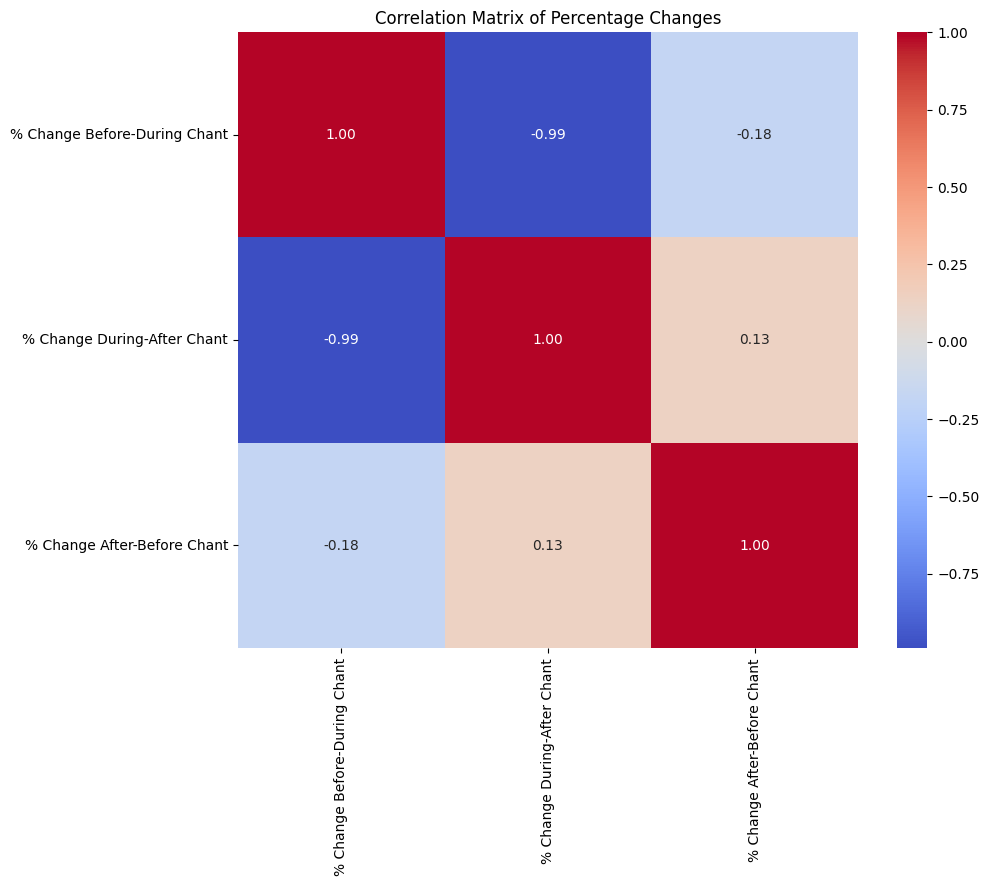

In [14]:
df_corr = df_num.drop(columns=['Parameter'])

correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Percentage Changes")
plt.show()

### Conclusion: <br>

XXX